# Clustering

## Installation der Bibliotheken

In [15]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler

from scipy.cluster import hierarchy

from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_samples, silhouette_score

## Einlesen und Visualisierung der Daten

In [13]:
data = pd.read_excel("C:\\Users\\Tim\\Desktop\\Buchprojekt KI Medizin\\Programmierung\\Pneumonie_Clustering.xlsx", sheet_name = "Tabelle1")

data = data.dropna()

data.head()

,CRP (mg/dl),Temperatur (°C),Diagnose
0,0.211264,36.363220,gesund
1,0.135466,36.245230,gesund
2,0.017881,35.347354,gesund
3,0.138615,37.867338,gesund
4,0.018558,36.989171,gesund


In [16]:
Diagnose_neu = {"gesund": 0, "COVID-19": 1, "BaktPneumonie": 2}

data["Diagnose"] = data["Diagnose"].replace(Diagnose_neu)

data.head()

,CRP (mg/dl),Temperatur (°C),Diagnose
0,0.211264,36.363220,0
1,0.135466,36.245230,0
2,0.017881,35.347354,0
3,0.138615,37.867338,0
4,0.018558,36.989171,0


Text(0, 0.5, 'Temperatur (°C)')

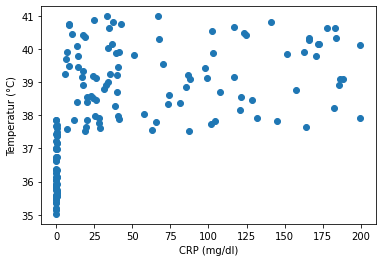

In [4]:
plt.scatter(data["CRP (mg/dl)"], data["Temperatur (°C)"])

plt.xlabel("CRP (mg/dl)")
plt.ylabel("Temperatur (°C)")

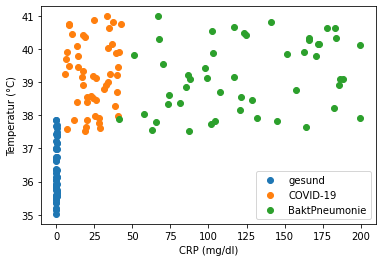

In [5]:
group1 = data[data["Diagnose"] == 0]
group2 = data[data["Diagnose"] == 1]
group3 = data[data["Diagnose"] == 2]

plt.scatter(group1["CRP (mg/dl)"], group1["Temperatur (°C)"], label = "gesund")
plt.scatter(group2["CRP (mg/dl)"], group2["Temperatur (°C)"], label = "COVID-19")
plt.scatter(group3["CRP (mg/dl)"], group3["Temperatur (°C)"], label = "BaktPneumonie")

plt.xlabel("CRP (mg/dl)")
plt.ylabel("Temperatur (°C)")

plt.legend()

## k-Means-Clustering

In [6]:
kmeans = KMeans(n_clusters = 3)

model_kmeans = kmeans.fit_predict(data[["CRP (mg/dl)","Temperatur (°C)"]])

C:\Users\Tim\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
data["cluster"] = model_kmeans

print(data)

In [ ]:
group1 = data[data.cluster == 0]
group2 = data[data.cluster == 1]
group3 = data[data.cluster == 2]

plt.scatter(group1["CRP (mg/dl)"], group1["Temperatur (°C)"], label = "gesund")
plt.scatter(group2["CRP (mg/dl)"], group2["Temperatur (°C)"], label = "COVID-19")
plt.scatter(group3["CRP (mg/dl)"], group3["Temperatur (°C)"], label = "BaktPneumonie")

plt.xlabel("CRP (mg/dl)")
plt.ylabel("Temperatur (°C)")

plt.legend()

In [17]:
scaler = MinMaxScaler()

scaler.fit(data[["Temperatur (°C)"]])
data["Temperatur (°C)_skaliert"] = scaler.transform(data[["Temperatur (°C)"]])

scaler.fit(data[["CRP (mg/dl)"]])
data["CRP (mg/dl)_skaliert"] = scaler.transform(data[["CRP (mg/dl)"]])

In [ ]:
group1 = data[data["Diagnose"] == 0]
group2 = data[data["Diagnose"] == 1]
group3 = data[data["Diagnose"] == 2]

plt.scatter(group1["CRP (mg/dl)_skaliert"], group1["Temperatur (°C)_skaliert"], label = "gesund")
plt.scatter(group2["CRP (mg/dl)_skaliert"], group2["Temperatur (°C)_skaliert"], label = "COVID-19")
plt.scatter(group3["CRP (mg/dl)_skaliert"], group3["Temperatur (°C)_skaliert"], label = "BaktPneumonie")

plt.xlabel("CRP (mg/dl)_skaliert")
plt.ylabel("Temperatur (°C)_skaliert")

plt.legend()

In [ ]:
kmeans = KMeans(n_clusters = 3)

model_kmeans_skaliert = kmeans.fit_predict(data[["CRP (mg/dl)_skaliert",
                                                 "Temperatur (°C)_skaliert"]])

In [ ]:
data["cluster"] = model_kmeans_skaliert

print(data)

In [7]:
group1 = data[data.cluster == 0]
group2 = data[data.cluster == 1]
group3 = data[data.cluster == 2]

plt.scatter(group1["CRP (mg/dl)_skaliert"], group1["Temperatur (°C)_skaliert"], label = "gesund")
plt.scatter(group2["CRP (mg/dl)_skaliert"], group2["Temperatur (°C)_skaliert"], label = "COVID-19")
plt.scatter(group3["CRP (mg/dl)_skaliert"], group3["Temperatur (°C)_skaliert"], label = "BaktPneumonie")

plt.xlabel("CRP (mg/dl)_skaliert")
plt.ylabel("Temperatur (°C)_skaliert")

plt.legend()

AttributeError: 'DataFrame' object has no attribute 'cluster'

## Hierarchical Clustering

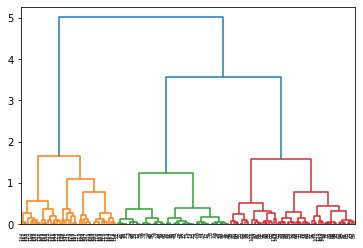

In [20]:
hierarchical = hierarchy.linkage(data[["CRP (mg/dl)_skaliert",
                                       "Temperatur (°C)_skaliert"]], 
                                       method = "ward")

hierarchy.dendrogram(hierarchical)

plt.show()

In [18]:
hierarchical = AgglomerativeClustering(n_clusters = 3, linkage = "ward")

model_hierarchical = hierarchical.fit(data[["CRP (mg/dl)_skaliert", "Temperatur (°C)_skaliert"]])

labels = model_hierarchical.labels_

In [9]:
data["cluster"] = labels

print(data)

     CRP (mg/dl)  Temperatur (°C)  Diagnose  Temperatur (°C)_skaliert  \
0       0.211264        36.363220         0                  0.224344   
1       0.135466        36.245230         0                  0.204591   
2       0.017881        35.347354         0                  0.054271   
3       0.138615        37.867338         0                  0.476160   
4       0.018558        36.989171         0                  0.329139   
..           ...              ...       ...                       ...   
145    65.287584        37.793807         2                  0.463849   
146   163.786523        37.655752         2                  0.440737   
147   116.951834        40.674734         2                  0.946166   
148   120.430778        38.158390         2                  0.524887   
149    98.854164        39.118878         2                  0.685689   

     CRP (mg/dl)_skaliert  cluster  
0                0.001044        2  
1                0.000664        2  
2           

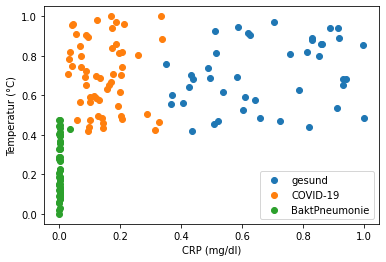

In [10]:
group1 = data[data.cluster == 0]
group2 = data[data.cluster == 1]
group3 = data[data.cluster == 2]

plt.scatter(group1["CRP (mg/dl)_skaliert"], group1["Temperatur (°C)_skaliert"], label = "gesund")
plt.scatter(group2["CRP (mg/dl)_skaliert"], group2["Temperatur (°C)_skaliert"], label = "COVID-19")
plt.scatter(group3["CRP (mg/dl)_skaliert"], group3["Temperatur (°C)_skaliert"], label = "BaktPneumonie")

plt.xlabel("CRP (mg/dl)")
plt.ylabel("Temperatur (°C)")

plt.legend()

## Ellbogen- und Silhouetten-Methode

In [ ]:
Sum_of_squared_distances = []
k = range(1, 10) 

for num_clusters in k:
    kmeans = KMeans(n_clusters = num_clusters)
    kmeans.fit(data[["CRP (mg/dl)_skaliert", "Temperatur (°C)_skaliert"]])
    Sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(k, Sum_of_squared_distances, "o-")
plt.xlabel("k") 
plt.ylabel("Inertia") 

In [ ]:
silhouette_avg = []
range_n_clusters = range(2, 10)

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters)
    kmeans.fit(data[["CRP (mg/dl)_skaliert","Temperatur (°C)_skaliert"]])
    cluster_labels = kmeans.labels_

    silhouette_avg.append(silhouette_score(data[["CRP (mg/dl)_skaliert",
                                                 "Temperatur (°C)_skaliert"]],
                                                 cluster_labels))

plt.plot(range_n_clusters, silhouette_avg, "o-")
plt.xlabel("k")
plt.ylabel("Silhouettenkoeffizient")